## Code used to create ppu table
- table saved at ebmdatalab.outlier_detection.ppu_national_presentation_level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
GBQ_PROJECT_ID = '620265099307'

q = '''
SELECT
  month,
  bnf_code,
  SUM(ppu) as ppu
FROM
  ebmdatalab.outlier_detection.ppu_national_presentation_level
GROUP BY
  month, bnf_code
ORDER BY
  bnf_code, month
'''
ppu = pd.io.gbq.read_gbq(q, GBQ_PROJECT_ID, verbose=False, dialect='standard')
ppu.head(10)

,month,bnf_code,ppu
0,2017-08-01,23944109561,3.976
1,2011-04-01,23944109561,3.755
2,2011-05-01,23944109561,3.755
3,2011-06-01,23944109561,3.755
4,2011-07-01,23944109561,3.755
5,2011-08-01,23944109561,3.755
6,2011-09-01,23944109561,3.755
7,2011-10-01,23944109561,3.755
8,2011-11-01,23944109561,3.755
9,2011-12-01,23944109561,3.755


In [2]:
df = ppu[['month','bnf_code','ppu']]
df = df.sort_values(['bnf_code','month'])
df = df.set_index(['bnf_code', 'month'])
df = df.unstack()
df.head(10)

ppu                                              \
month           2010-08-01 2010-09-01 2010-10-01 2010-11-01 2010-12-01   
bnf_code                                                                 
0101010C0AAAAAA   0.031264   0.031261   0.031264   0.031262   0.031263   
0101010C0AAACAC        NaN        NaN        NaN        NaN        NaN   
0101010C0AAAHAH        NaN        NaN        NaN        NaN        NaN   
0101010C0BBAAAA   0.031263   0.031265   0.031265   0.031265   0.031265   
0101010E0AAAAAA   0.005580   0.005580        NaN        NaN        NaN   
0101010E0AAAEAE   0.005577   0.005580   0.005580   0.005580   0.005580   
0101010F0AAAIAI        NaN        NaN        NaN        NaN        NaN   
0101010F0AAAUAU   3.384415   3.032392   3.143831   3.345592   3.194484   
0101010F0BCAAAU        NaN        NaN        NaN        NaN        NaN   
0101010G0AAABAB   0.004724   0.004731   0.004753   0.004766   0.004759   

                                                                        \
month           2011-01-01 2011-02-01 2011-03-01 2011-04-01 2011-05-01   
bnf_code                                                                 
0101010C0AAAAAA   0.038091   0.038092   0.038091   0.038090   0.038091   
0101010C0AAACAC        NaN        NaN        NaN        NaN        NaN   
0101010C0AAAHAH        NaN        NaN        NaN        NaN        NaN   
0101010C0BBAAAA   0.038092   0.038093   0.038090   0.038092   0.038090   
0101010E0AAAAAA        NaN        NaN        NaN        NaN        NaN   
0101010E0AAAEAE   0.005580   0.005579   0.005580   0.005580   0.005580   
0101010F0AAAIAI        NaN        NaN        NaN        NaN        NaN   
0101010F0AAAUAU   2.180115   2.977375   2.886040   3.260497   2.663462   
0101010F0BCAAAU        NaN        NaN        NaN        NaN        NaN   
0101010G0AAABAB   0.004769   0.004773   0.004761   0.004787   0.004791   

                   ...                                                  \
month              ...     2016-11-01 2016-12-01 2017-01-01 2017-02-01   
bnf_code           ...                                                   
0101010C0AAAAAA    ...       0.114256   0.114256   0.114257   0.114257   
0101010C0AAACAC    ...            NaN        NaN        NaN        NaN   
0101010C0AAAHAH    ...            NaN        NaN        NaN        NaN   
0101010C0BBAAAA    ...       0.114259   0.114255   0.114257   0.114256   
0101010E0AAAAAA    ...            NaN        NaN        NaN        NaN   
0101010E0AAAEAE    ...            NaN        NaN        NaN        NaN   
0101010F0AAAIAI    ...            NaN        NaN        NaN        NaN   
0101010F0AAAUAU    ...       3.350879   3.569366   3.432903   3.432974   
0101010F0BCAAAU    ...            NaN   3.073333        NaN   3.073333   
0101010G0AAABAB    ...       0.005999   0.006001   0.005984   0.005982   

                                                                        \
month           2017-03-01 2017-04-01 2017-05-01 2017-06-01 2017-07-01   
bnf_code                                                                 
0101010C0AAAAAA   0.114256   0.114258   0.114260   0.114256   0.114256   
0101010C0AAACAC        NaN        NaN        NaN        NaN        NaN   
0101010C0AAAHAH        NaN        NaN        NaN        NaN        NaN   
0101010C0BBAAAA   0.114255   0.114257   0.114256   0.114256   0.114256   
0101010E0AAAAAA        NaN        NaN        NaN        NaN        NaN   
0101010E0AAAEAE        NaN        NaN        NaN        NaN        NaN   
0101010F0AAAIAI        NaN        NaN        NaN        NaN        NaN   
0101010F0AAAUAU   3.552508   3.658264   3.048665   3.471806   3.617151   
0101010F0BCAAAU        NaN   3.073333   3.073333        NaN        NaN   
0101010G0AAABAB   0.005990   0.005981   0.005990   0.005980   0.005980   

                            
month           2017-08-01  
bnf_code                    
0101010C0AAAAAA   0.114256  
0101010C0AAACAC        NaN  
0101010C0AAAHAH        NaN

In [3]:
df.describe()

ppu                                                          \
month    2010-08-01    2010-09-01    2010-10-01    2010-11-01    2010-12-01   
count  18816.000000  1.909100e+04  18998.000000  19120.000000  1.904900e+04   
mean       7.793621           inf      7.662830      7.820431           inf   
std       41.078366           NaN     36.407590     37.399973           NaN   
min        0.000000  0.000000e+00      0.000000      0.000000  0.000000e+00   
25%        0.161736  1.658868e-01      0.163404      0.164789  1.660459e-01   
50%        1.295464  1.347667e+00      1.333059      1.339671  1.344000e+00   
75%        3.676000  3.696000e+00      3.692000      3.709998  3.692000e+00   
max     2147.000000           inf   1080.000000   1080.000000           inf   

                                                                             \
month    2011-01-01    2011-02-01    2011-03-01    2011-04-01    2011-05-01   
count  18989.000000  18932.000000  19186.000000  18681.000000  18981.000000   
mean       7.665085      7.777239      7.723404      8.093264      7.878808   
std       36.031527     36.221854     35.463817     38.989113     35.822322   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.166182      0.170000      0.171000      0.170000      0.173578   
50%        1.360933      1.381667      1.381667      1.363000      1.381667   
75%        3.738000      3.760000      3.760000      3.810000      3.835000   
max     1080.000000   1200.000000   1200.000000   1395.000000   1200.000000   

           ...                                                               \
month      ...         2016-11-01    2016-12-01    2017-01-01    2017-02-01   
count      ...       22371.000000  21871.000000  21847.000000  21912.000000   
mean       ...          10.274211     10.283240     10.272818     10.507697   
std        ...          43.950356     45.073877     43.972449     46.863012   
min        ...           0.000861      0.000728      0.000714      0.000727   
25%        ...           0.276698      0.290999      0.291571      0.290071   
50%        ...           1.890000      1.963931      1.972000      1.980000   
75%        ...           5.390000      5.368667      5.441069      5.500000   
max        ...        2181.530000   2181.530000   2181.530000   2181.530000   

                                                                             \
month    2017-03-01    2017-04-01    2017-05-01    2017-06-01    2017-07-01   
count  22267.000000  21818.000000  22148.000000  22297.000000  2.222000e+04   
mean      10.586398     10.328919     10.687491     10.589187           inf   
std       45.631957     41.990590     47.290089     44.310416           NaN   
min        0.000333      0.000713      0.000100      0.000711  7.054056e-04   
25%        0.296633      0.291667      0.292004      0.299000  3.035741e-01   
50%        2.010000      1.988762      1.980000      2.030000  2.066077e+00   
75%        5.600500      5.520000      5.512000      5.621352  5.714000e+00   
max     2656.875000   2181.530000   2181.530000   2181.530000           inf   

                     
month    2017-08-01  
count  22263.000000  
mean      10.839214  
std       45.197023  
min        0.000729  
25%        0.309269  
50%        2.072500  
75%        5.760951  
max     2181.530000  

[8 rows x 85 columns]

In [85]:
months_smoothing = 12
sensitivity = 5

# remove date labels from columns
dates = df.columns #save date labels for later
df.columns = range(df.shape[1])

# create necessary tables with same index
smax = pd.DataFrame(index=df.index)
smin = pd.DataFrame(index=df.index)
reference_value = pd.DataFrame(index=df.index)
threshold = pd.DataFrame(index=df.index)
alert = pd.DataFrame(index=df.index)
not_alert = pd.DataFrame(index=df.index)

# set initial values for s
smax[0] = 0
smin[0] = 0

# set initial reference value for each 
reference_value[0] = df.loc[:,0:months_smoothing-1].mean(axis=1)
#set initial threshold
threshold[0] = df.loc[:,0:months_smoothing-1].std(axis=1, ddof=0) * sensitivity

# loop over months of data
for i in range(1,df.shape[1]):
    
    # logic to determine alerts from previous month
    alert = (smax[i-1] > threshold[i-1]) | (smin[i-1] < -threshold[i-1])
    not_alert = (smax[i-1] <= threshold[i-1]) & (smin[i-1] >= -threshold[i-1])
    ## I'm sure there's a way of doing without this ^ one,
        # just coudn't work out the syntax to slice pandas rows
        # based on the opposite of the array of boolean values
        
    # reference value and threshold:
    ##append previous value if no alert
    reference_value.loc[not_alert, i] = reference_value.loc[not_alert, i-1]
    threshold[i] = threshold[i-1]
    
    ## reset reference after alert
    reference_value.loc[alert, i] = df.loc[alert,i-months_smoothing:i-1].mean(axis=1)
    
    # CUSUM calculation (adding on previous s values done elsewhere)
    ##threshold[[i]] / sensitivity is a way of deriving stdev without generating it again
    smax[i] = df[i] - (reference_value[i] + (0.5 * threshold[i] / sensitivity))
    smin[i] = df[i] - (reference_value[i] - (0.5 * threshold[i] / sensitivity))
    
    # retrigger logic
    retrigger_pos = (smax[i] > 0) & (smax[i-1] > threshold[i-1])
    retrigger_neg = (smin[i] < 0) & (smin[i-1] < -threshold[i-1])
    cont_cumulative = not_alert|retrigger_pos|retrigger_neg
    thres_res = alert!=retrigger_pos|retrigger_neg
    
    # reset threshold
    threshold.loc[thres_res, i] = df.loc[thres_res,i-months_smoothing:i-1].std(axis=1, ddof=0) * sensitivity
    
    # add s from previous month if no trigger, or retrigger
    smax.loc[cont_cumulative, i] = smax.loc[cont_cumulative, i] + smax.loc[cont_cumulative, i-1]
    smin.loc[cont_cumulative, i] = smin.loc[cont_cumulative, i] + smin.loc[cont_cumulative, i-1]
    
    # set baselines of zero
    smax.loc[smax[i] < 0, i] = 0
    smin.loc[smin[i] > 0, i] = 0

# determine &export alerts
alert_pos = (smax > threshold)
alert_pos.to_csv('alert_pos_pandas.csv')

alert_neg = (smin < -threshold)
alert_neg.to_csv('alert_neg_pandas.csv')

# other potentially useful outputs (for drawing graphs etc)
#smax
#smin
#value
#reference_value
#threshold

In [5]:
alert_pos.describe()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
count,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773,...,48773,48773,48773,48773,48773,48773,48773,48773,48773,48773
unique,1,1,1,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,48773,48773,48773,48773,48767,48747,48688,48723,48740,48741,...,45982,46808,48054,48006,47997,47947,47927,47865,47816,47824


In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
bnf_code,,,,,,,,,,,,,,,,,,,,,
0101010C0AAAAAA,0.031264,0.031261,0.031264,0.031262,0.031263,0.038091,0.038092,0.038091,0.038090,0.038091,...,0.114256,0.114256,0.114257,0.114257,0.114256,0.114258,0.114260,0.114256,0.114256,0.114256
0101010C0AAACAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0101010C0AAAHAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0101010C0BBAAAA,0.031263,0.031265,0.031265,0.031265,0.031265,0.038092,0.038093,0.038090,0.038092,0.038090,...,0.114259,0.114255,0.114257,0.114256,0.114255,0.114257,0.114256,0.114256,0.114256,0.114256
0101010E0AAAAAA,0.005580,0.005580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0101010E0AAAEAE,0.005577,0.005580,0.005580,0.005580,0.005580,0.005580,0.005579,0.005580,0.005580,0.005580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0101010F0AAAIAI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0101010F0AAAUAU,3.384415,3.032392,3.143831,3.345592,3.194484,2.180115,2.977375,2.886040,3.260497,2.663462,...,3.350879,3.569366,3.432903,3.432974,3.552508,3.658264,3.048665,3.471806,3.617151,3.313827
0101010F0BCAAAU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.073333,NaN,3.073333,NaN,3.073333,3.073333,NaN,NaN,3.073333


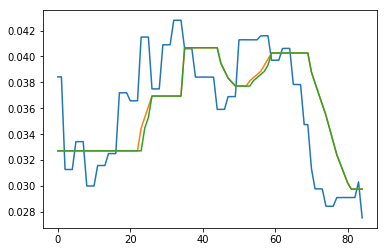

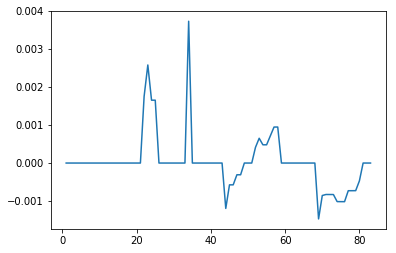

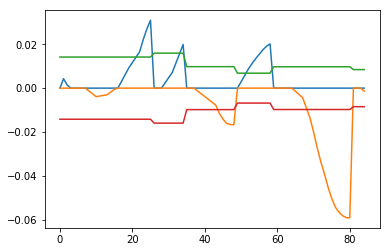

In [91]:
import matplotlib.pyplot as plt

measure = '0407010H0AAAAAA'
plt.plot(df.loc[measure])
plt.plot(reference_value.loc[measure])
plt.plot(change_from.loc[measure])
plt.show()

plt.plot(change.loc[measure])
plt.show()

plt.plot(smax.loc[measure])
plt.plot(smin.loc[measure])
plt.plot(threshold.loc[measure])
plt.plot(-threshold.loc[measure])
plt.show()

In [92]:
change_from = reference_value.copy()
change = pd.DataFrame(index=df.index)
change[0] = np.nan

for i in range(1,df.shape[1]):
    #change_from[i].loc[(smax[i]!=0)] = reference_value[i-1]
    if i < df.shape[1] -1:
        change[i] = reference_value[i+1] - change_from[i]
'''    
    if smax[i]==0:
        change_from[i] = reference_value[i]
    else:
        change_from[i] = reference_value[i-1]
'''
change_from.loc['0407010H0AAAAAA']
#change.loc['0407010H0AAAAAA']
#if smax!=0 copy reference_value from previous month

0     0.032711
1     0.032711
2     0.032711
3     0.032711
4     0.032711
5     0.032711
6     0.032711
7     0.032711
8     0.032711
9     0.032711
10    0.032711
11    0.032711
12    0.032711
13    0.032711
14    0.032711
15    0.032711
16    0.032711
17    0.032711
18    0.032711
19    0.032711
20    0.032711
21    0.032711
22    0.032711
23    0.034464
24    0.035291
25    0.036117
26    0.036944
27    0.036944
28    0.036944
29    0.036944
        ...   
55    0.038607
56    0.038848
57    0.039321
58    0.039794
59    0.040268
60    0.040268
61    0.040268
62    0.040268
63    0.040268
64    0.040268
65    0.040268
66    0.040268
67    0.040268
68    0.040268
69    0.040268
70    0.038798
71    0.037944
72    0.037117
73    0.036289
74    0.035460
75    0.034446
76    0.033431
77    0.032415
78    0.031687
79    0.030959
80    0.030233
81    0.029763
82    0.029763
83    0.029763
84    0.029763
Name: 0407010H0AAAAAA, Length: 85, dtype: float64

In [87]:
reference_value.loc['0407010H0AAAAAA']

0     0.032711
1     0.032711
2     0.032711
3     0.032711
4     0.032711
5     0.032711
6     0.032711
7     0.032711
8     0.032711
9     0.032711
10    0.032711
11    0.032711
12    0.032711
13    0.032711
14    0.032711
15    0.032711
16    0.032711
17    0.032711
18    0.032711
19    0.032711
20    0.032711
21    0.032711
22    0.032711
23    0.034464
24    0.035291
25    0.036117
26    0.036944
27    0.036944
28    0.036944
29    0.036944
        ...   
55    0.038607
56    0.038848
57    0.039321
58    0.039794
59    0.040268
60    0.040268
61    0.040268
62    0.040268
63    0.040268
64    0.040268
65    0.040268
66    0.040268
67    0.040268
68    0.040268
69    0.040268
70    0.038798
71    0.037944
72    0.037117
73    0.036289
74    0.035460
75    0.034446
76    0.033431
77    0.032415
78    0.031687
79    0.030959
80    0.030233
81    0.029763
82    0.029763
83    0.029763
84    0.029763
Name: 0407010H0AAAAAA, Length: 85, dtype: float64

In [89]:
smax.loc['0407010H0AAAAAA']

0     0.000000
1     0.004298
2     0.001445
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.003066
18    0.006134
19    0.009205
20    0.011652
21    0.014103
22    0.016554
23    0.022170
24    0.026964
25    0.030931
26    0.000000
27    0.000000
28    0.000000
29    0.002363
        ...   
55    0.015385
56    0.017447
57    0.019045
58    0.020170
59    0.000000
60    0.000000
61    0.000000
62    0.000000
63    0.000000
64    0.000000
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.000000
73    0.000000
74    0.000000
75    0.000000
76    0.000000
77    0.000000
78    0.000000
79    0.000000
80    0.000000
81    0.000000
82    0.000000
83    0.000000
84    0.000000
Name: 0407010H0AAAAAA, Length: 85, dtype: float64

In [26]:
alert_pos.loc['0407010H0AAAAAA']

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23     True
24     True
25     True
26    False
27    False
28    False
29    False
      ...  
55     True
56     True
57     True
58     True
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
Name: 0407010H0AAAAAA, Length: 85, dtype: bool

In [ ]:
#eventually unstack to sort/find most interesting ones

In [18]:
smax[1]==0

bnf_code
0101010C0AAAAAA     True
0101010C0AAACAC    False
0101010C0AAAHAH    False
0101010C0BBAAAA     True
0101010E0AAAAAA     True
0101010E0AAAEAE    False
0101010F0AAAIAI    False
0101010F0AAAUAU     True
0101010F0BCAAAU    False
0101010G0AAABAB     True
0101010G0AAACAC    False
0101010G0BBABAB     True
0101010G0BBACAC    False
0101010G0BBAHAG    False
0101010G0BCABAB    False
0101010I0AAABAB     True
0101010I0AAACAC    False
0101010I0AAADAD    False
0101010I0AAAEAE    False
0101010I0AAAHAH    False
0101010I0AAAJAJ     True
0101010I0AAALAL    False
0101010I0AAAMAM     True
0101010I0AAATAT    False
0101010I0AAAUAU     True
0101010I0AAAVAV    False
0101010I0AAAXAX    False
0101010I0AAAYAY     True
0101010I0AABGBG    False
0101010I0AABIBI     True
                   ...  
23965909607         True
23965909609        False
23965909611        False
23965909611        False
23965909612        False
23965909614        False
23965909615        False
23965909616        False
23965909616     

In [46]:
change.describe()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
count,0.0,23781.0,23781.0,23781.0,2.378100e+04,2.378100e+04,2.378100e+04,2.378100e+04,2.378100e+04,2.378100e+04,...,23781.000000,23781.000000,23781.000000,23781.000000,23781.000000,23781.000000,23781.000000,23781.000000,23781.000000,23781.000000
mean,NaN,0.0,0.0,0.0,4.306719e-19,3.062993e-19,-4.996056e-19,1.433968e-18,2.844885e-18,1.088351e-18,...,0.005808,0.001585,0.001552,0.002518,0.004679,0.000376,0.000833,0.000707,0.002922,0.001198
std,NaN,0.0,0.0,0.0,4.792804e-17,8.307308e-17,2.607409e-16,3.043446e-16,3.045042e-16,1.948828e-16,...,0.286160,0.046711,0.115077,0.205872,0.664881,0.082147,0.065392,0.077807,0.447472,0.070283
min,NaN,0.0,0.0,0.0,0.000000e+00,-7.105427e-15,-2.842171e-14,-2.842171e-14,-7.105427e-15,-7.105427e-15,...,-1.928013,-1.552693,-1.980476,-1.994201,-4.835301,-1.732917,-2.488291,-5.472944,-2.038725,-0.743641
25%,NaN,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,NaN,0.0,0.0,0.0,7.105427e-15,7.105427e-15,1.421085e-14,2.842171e-14,2.842171e-14,2.842171e-14,...,28.517130,5.894837,14.407267,28.680239,102.132661,12.359141,5.391843,6.306277,68.687451,7.084114
